Name: Amity Lu

Github Username: Amitywen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import bootstrap
from scipy.stats import norm
import seaborn as sns

## Question  7

## (a)

proprocessing

In [2]:
feat = np.array(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing','walking'])
feat

array(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'], dtype='<U8')

In [3]:
for i in feat:
    if  i == 'bending1':
        j = 7
    elif i == 'bending2':
        j = 6
    else:
        j = 15

    for k in range(j):
        k = k+1
        path = "AReM/" + str(i) + "/dataset" + str(k) + ".csv"
        curr = pd.read_csv(path, skiprows=range(4), on_bad_lines='skip')
        if curr.isnull().values.any() == True:
            print(path)

Hence, solving this file with Excel  

 -> replace space with comma

### (b)

<AxesSubplot:>

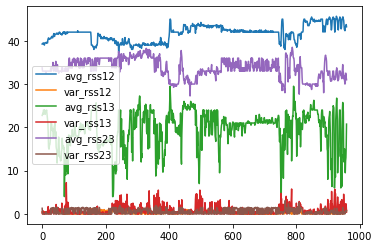

In [4]:
bending1_train = pd.read_csv("AReM/bending1/dataset1.csv",  skiprows=range(4))
bending1_train = pd.concat([bending1_train, pd.read_csv("AReM/bending1/dataset2.csv",  skiprows=range(4))], ignore_index=True)
bending1_train = bending1_train.drop('# Columns: time', axis = 1)
bending1_train.plot.line()

<AxesSubplot:>

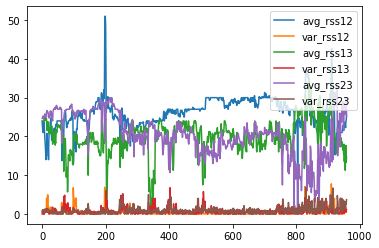

In [5]:
bending2_train = pd.read_csv("AReM/bending2/dataset1.csv",  skiprows=range(4))
bending2_train = pd.concat([bending2_train, pd.read_csv("AReM/bending2/dataset2.csv",  skiprows=range(4))], ignore_index=True)
bending2_train = bending2_train.drop('# Columns: time', axis = 1)
bending2_train.plot.line()

<AxesSubplot:>

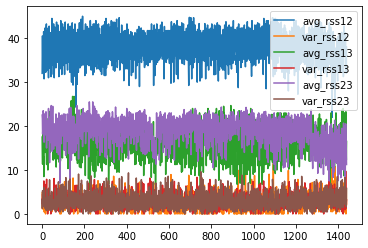

In [6]:
cycling_train = pd.read_csv("AReM/cycling/dataset1.csv",  skiprows=range(4))
cycling_train = pd.concat([cycling_train, pd.read_csv("AReM/cycling/dataset2.csv",  skiprows=range(4))], ignore_index=True)
cycling_train = pd.concat([cycling_train, pd.read_csv("AReM/cycling/dataset3.csv",  skiprows=range(4))], ignore_index=True)
cycling_train = cycling_train.drop('# Columns: time', axis = 1)
cycling_train.plot.line()

<AxesSubplot:>

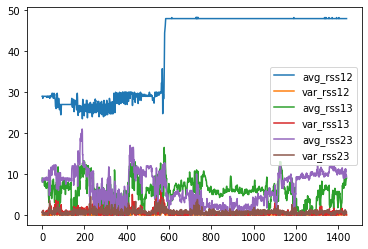

In [7]:
lying_train = pd.read_csv("AReM/lying/dataset1.csv",  skiprows=range(4))
lying_train = pd.concat([lying_train, pd.read_csv("AReM/lying/dataset2.csv",  skiprows=range(4))], ignore_index=True)
lying_train = pd.concat([lying_train, pd.read_csv("AReM/lying/dataset3.csv",  skiprows=range(4))], ignore_index=True)
lying_train = lying_train.drop('# Columns: time', axis = 1)
lying_train.plot.line()

<AxesSubplot:>

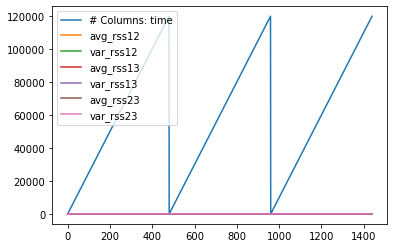

In [8]:
sitting_train = pd.read_csv("AReM/sitting/dataset1.csv",  skiprows=range(4))
sitting_train = pd.concat([sitting_train, pd.read_csv("AReM/sitting/dataset2.csv",  skiprows=range(4))], ignore_index=True)
sitting_train = pd.concat([sitting_train, pd.read_csv("AReM/sitting/dataset3.csv",  skiprows=range(4))], ignore_index=True)
sitting_train.drop('# Columns: time', axis = 1)
sitting_train.plot.line()

<AxesSubplot:>

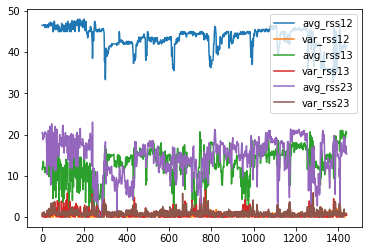

In [9]:
standing_train = pd.read_csv("AReM/standing/dataset1.csv",  skiprows=range(4))
standing_train = pd.concat([standing_train, pd.read_csv("AReM/standing/dataset2.csv",  skiprows=range(4))], ignore_index=True)
standing_train = pd.concat([standing_train, pd.read_csv("AReM/standing/dataset3.csv",  skiprows=range(4))], ignore_index=True)
standing_train = standing_train.drop('# Columns: time', axis = 1)
standing_train.plot.line()

<AxesSubplot:>

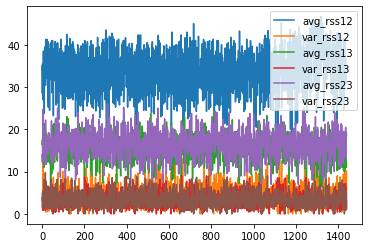

In [10]:
walking_train = pd.read_csv("AReM/walking/dataset1.csv",  skiprows=range(4))
walking_train = pd.concat([walking_train, pd.read_csv("AReM/walking/dataset2.csv",  skiprows=range(4))], ignore_index=True)
walking_train = pd.concat([walking_train, pd.read_csv("AReM/walking/dataset3.csv",  skiprows=range(4))], ignore_index=True)
walking_train = walking_train.drop('# Columns: time', axis = 1)
walking_train.plot.line()

In [11]:
# reference: https://stackoverflow.com/questions/26246864/restoring-the-default-display-context-in-pandas
# pd.set_option("max_rows", None)
# pd.reset_option('all')

train = pd.DataFrame()
train = pd.concat([train, bending1_train])
train = pd.concat([train, bending2_train])
train = pd.concat([train, cycling_train])
train = pd.concat([train, lying_train])
train = pd.concat([train, sitting_train])
train = pd.concat([train, walking_train])

train = train.drop('# Columns: time', axis = 1)
train

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,39.25,0.43,22.75,0.43,33.75,1.30
1,39.25,0.43,23.00,0.00,33.00,0.00
2,39.25,0.43,23.25,0.43,33.00,0.00
3,39.50,0.50,23.00,0.71,33.00,0.00
4,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...
1435,36.00,2.45,17.00,5.10,20.50,0.87
1436,34.33,1.89,15.00,2.45,17.00,2.12
1437,33.00,7.35,14.60,3.14,13.00,5.70
1438,31.67,1.25,11.00,6.16,19.25,2.17


## (c)
### i
Simple statistical features

Calculate max, mean, median, min, std, var, mode

Kurtosis, Skew, Quantile/Percentile-function, Autocorrelation, Correlation


reference:     
https://stats.stackexchange.com/questions/50807/features-for-time-series-classification      
https://medium.com/@dreamferus/time-series-feature-extraction-using-pandas-44af6fb5fce9


### ii
Extract the time-domain features 

minimum, 
maximum, 
mean, 
median, 
stan- dard deviation, 
first quartile,
third quartile
for all of the 6 time series in each instance. 

You are free to normalize/standardize features or use them directly.2 (20 pts)

In [12]:
# for all data
stat = np.array(['min','max','mean','median','std','Firquartile','Thirdquartile'])

min = pd.DataFrame()
max = pd.DataFrame()
mean = pd.DataFrame()
median = pd.DataFrame()
std = pd.DataFrame()
Firquartile = pd.DataFrame()
Thirdquartile =pd.DataFrame()

        
# 'min1', 'max1', 'mean1',' median1', 'std1', '1st quartile1', '3rd quartile1'
# feat = 'bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing','walking'

for i in feat:
    if  i == 'bending1':
        j = 7
    elif i == 'bending2':
        j = 6
    else:
        j = 15

    for k in range(j):
        k = k+1
        path = "AReM/" + str(i) + "/dataset" + str(k) + ".csv"
        curr = pd.read_csv(path, skiprows=range(4), on_bad_lines='skip')
        curr = curr.drop('# Columns: time', axis = 1)
        
        min = pd.concat([min,pd.DataFrame(curr.min()).T], ignore_index=True)
        max = pd.concat([max, pd.DataFrame(curr.max()).T], ignore_index=True)
        mean = pd.concat([mean, pd.DataFrame(curr.mean()).T], ignore_index=True)
        median = pd.concat([median, pd.DataFrame(curr.median()).T], ignore_index=True)
        std = pd.concat([std, pd.DataFrame(curr.std()).T], ignore_index=True)
        Firquartile = pd.concat([Firquartile, pd.DataFrame(curr.quantile(q = 0.25)).T], ignore_index=True)
        Thirdquartile = pd.concat([Thirdquartile, pd.DataFrame(curr.quantile(q = 0.75)).T], ignore_index=True)

for i in stat:
    if(i == 'mean'):
        mean = mean.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'max'):
        max = max.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'min'):
        min = min.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'median'):
        median = median.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'std'):
        std = std.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'Firquartile'):
        Firquartile = Firquartile.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'Thirdquartile'):
        Thirdquartile = Thirdquartile.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })

Ex = pd.DataFrame()
Ex = pd.concat([Ex, mean])
Ex = pd.concat([Ex.stack(), max.stack()]).unstack()
Ex = pd.concat([Ex.stack(), min.stack()]).unstack()
Ex = pd.concat([Ex.stack(), median.stack()]).unstack()
Ex = pd.concat([Ex.stack(), std.stack()]).unstack()
Ex = pd.concat([Ex.stack(), Firquartile.stack()]).unstack()
Ex = pd.concat([Ex.stack(), Thirdquartile.stack()]).unstack()
Ex

,avg_rss12_Firquartile,avg_rss12_Thirdquartile,avg_rss12_max,avg_rss12_mean,avg_rss12_median,avg_rss12_min,avg_rss12_std,avg_rss13_Firquartile,avg_rss13_Thirdquartile,avg_rss13_max,...,var_rss13_median,var_rss13_min,var_rss13_std,var_rss23_Firquartile,var_rss23_Thirdquartile,var_rss23_max,var_rss23_mean,var_rss23_median,var_rss23_min,var_rss23_std
0,39.25,42.0000,45.00,40.624792,40.50,37.25,1.476967,16.00,23.2500,29.50,...,0.50,0.0,0.965659,0.0000,1.3000,1.92,0.570583,0.43,0.00,0.582915
1,42.00,43.6700,45.67,42.812812,42.50,38.00,1.435550,19.00,22.2500,29.50,...,0.50,0.0,1.047259,0.0000,1.3000,3.11,0.571083,0.43,0.00,0.601010
2,43.00,45.0000,47.40,43.954500,44.33,35.00,1.558835,19.75,24.0000,29.75,...,0.43,0.0,0.550657,0.0000,0.9400,1.79,0.493292,0.43,0.00,0.513506
3,39.15,45.0000,47.75,42.179813,43.50,33.00,3.670666,20.50,24.3725,30.00,...,0.83,0.0,0.953730,0.0000,1.0000,2.18,0.613521,0.50,0.00,0.524317
4,41.33,42.7500,45.75,41.678063,41.75,33.00,2.243490,16.50,22.0625,28.25,...,0.50,0.0,0.928801,0.0000,0.5000,1.79,0.383292,0.43,0.00,0.389164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,30.25,37.0000,45.33,33.586875,34.25,19.50,4.650935,13.25,17.2700,23.25,...,3.10,0.0,1.647474,2.0500,4.3225,8.32,3.259729,3.11,0.00,1.640243
84,31.00,38.0000,45.50,34.322750,35.25,19.75,4.752477,13.50,17.0000,22.25,...,3.11,0.0,1.500046,2.1575,4.5650,9.67,3.432562,3.20,0.00,1.732727
85,31.25,37.8125,46.00,34.546229,35.25,19.50,4.842294,13.25,17.0000,22.67,...,2.86,0.0,1.665184,2.1600,4.3350,10.00,3.338125,3.08,0.00,1.656742
86,31.75,38.2500,46.25,34.873229,35.25,23.50,4.531720,13.50,17.2500,24.25,...,3.03,0.0,1.519348,2.1700,4.5000,9.51,3.424646,3.27,0.00,1.690960


In [13]:
Ex.isnull().values.any()

False

In [14]:
# https://datatofish.com/check-nan-pandas-dataframe/

print(std.isnull().values.any())
print(std.isnull().sum().sum())
indices = np.where(np.isnan(std))
for row, col in zip(*indices):
    print(row,col)
    #a[row,col] = np.mean(a[~np.isnan(a[:,col]), col])
#std = std.replace(np.nan,std.mean())
#print(std.isnull().values.any())

print(mean.isnull().values.any())
indices = np.where(np.isnan(mean))
for row, col in zip(*indices):
    print(row,col)

False
0
False


## iii  
estimate the std of each time-domain features 

In [15]:
standard = pd.DataFrame(Ex.std())
standard.columns = ["Estimated Standard Deviation"]
standard

,Estimated Standard Deviation
avg_rss12_Firquartile,6.153874
avg_rss12_Thirdquartile,5.138925
avg_rss12_max,4.394362
avg_rss12_mean,5.335700
avg_rss12_median,5.440054
avg_rss12_min,9.569975
avg_rss12_std,1.772185
avg_rss13_Firquartile,4.220658
avg_rss13_Thirdquartile,4.171628
avg_rss13_max,4.875137


In [16]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
# feat2 = Ex.columns

# for i in feat2:
#     curr = Ex[i].to_numpy()
#     curr = (curr,)
#     rng = np.random.default_rng()
#     res = bootstrap(curr, np.std, confidence_level=0.9, random_state=rng)
#     low, high = res.confidence_interval

In [17]:
from sklearn.utils import resample

confmin ={}
confmax={}
for co in Ex.columns.tolist():
    boot = []
    for i in range (0,1000):
        subset = resample(Ex[co],n_samples=88)
        boot.append(np.std(subset))
    boot.sort()
    confmin[co]=boot[49]
    confmax[co]=boot[949]

In [18]:
standard['confidence interval lower'] = confmin.values()
standard['confidence interval higher'] = confmax.values()
standard

,Estimated Standard Deviation,confidence interval lower,confidence interval higher
avg_rss12_Firquartile,6.153874,5.562492,6.605141
avg_rss12_Thirdquartile,5.138925,4.284243,5.818686
avg_rss12_max,4.394362,3.362611,5.338342
avg_rss12_mean,5.335700,4.671113,5.878907
avg_rss12_median,5.440054,4.770757,5.964545
avg_rss12_min,9.569975,8.173031,10.757105
avg_rss12_std,1.772185,1.569856,1.931643
avg_rss13_Firquartile,4.220658,3.617190,4.649801
avg_rss13_Thirdquartile,4.171628,3.481822,4.671539
avg_rss13_max,4.875137,4.190553,5.476246


In [19]:
row, col = standard.shape
for i in range(row):
    if (standard.iloc[i,0]<standard.iloc[i,1]) or (standard.iloc[i,0]>standard.iloc[i,2]):
        print('over the confindence interval')
    else:
        print('inside')

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


## 7 (iv)
- Maximum value: To capture the maximum value of the time series 
- Median value: To capture central tendancy and outliers can be accomodated 
- Mean: ill give aggregated value for the dataset

In [20]:
# reference:
# https://online.stat.psu.edu/stat510/lesson/1/1.1

## 7 (v)

In [21]:
# for trainig set

min_tr = pd.DataFrame()
max_tr = pd.DataFrame()
mean_tr = pd.DataFrame()
median_tr = pd.DataFrame()
std_tr = pd.DataFrame()
Firqua_tr = pd.DataFrame()
Thirdqua_tr =pd.DataFrame()

for i in feat:
    if  i == 'bending1':
        j = 2
    elif i == 'bending2':
        j = 2
    else:
        j = 3

    for k in range(j):
        k = k+1
        path = "AReM/" + str(i) + "/dataset" + str(k) + ".csv"
        curr = pd.read_csv(path, skiprows=range(4), on_bad_lines='skip')
        curr = curr.drop('# Columns: time', axis = 1)
        
        min_tr = pd.concat([min_tr,pd.DataFrame(curr.min()).T], ignore_index=True)
        max_tr = pd.concat([max_tr, pd.DataFrame(curr.max()).T], ignore_index=True)
        mean_tr = pd.concat([mean_tr, pd.DataFrame(curr.mean()).T], ignore_index=True)
        median_tr = pd.concat([median_tr, pd.DataFrame(curr.median()).T], ignore_index=True)
        std_tr = pd.concat([std_tr, pd.DataFrame(curr.std()).T], ignore_index=True)
        Firqua_tr = pd.concat([Firqua_tr, pd.DataFrame(curr.quantile(q = 0.25)).T], ignore_index=True)
        Thirdqua_tr = pd.concat([Thirdqua_tr, pd.DataFrame(curr.quantile(q = 0.75)).T], ignore_index=True)

for i in stat:
    if(i == 'mean'):
        mean_tr = mean_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'max'):
        max_tr = max_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'min'):
        min_tr = min_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'median'):
        median_tr = median_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'std'):
        std_tr = std_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'Firquartile'):
        Firqua_tr= Firqua_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })
    if(i == 'Thirdquartile'):
        Thirdqua_tr = Thirdqua_tr.rename(columns={'avg_rss12': 'avg_rss12_'+i, 'var_rss12': 'var_rss12_'+i,'avg_rss13':'avg_rss13_'+i,'var_rss13':'var_rss13_'+i,'avg_rss23':'avg_rss23_'+i,'var_rss23':'var_rss23_'+i })

train2 = pd.DataFrame()
train2 = pd.concat([train2, mean_tr])
train2 = pd.concat([train2.stack(), max_tr.stack()]).unstack()
train2 = pd.concat([train2.stack(), min_tr.stack()]).unstack()
train2 = pd.concat([train2.stack(), median_tr.stack()]).unstack()
train2 = pd.concat([train2.stack(), std_tr.stack()]).unstack()
train2 = pd.concat([train2.stack(), Firqua_tr.stack()]).unstack()
train2 = pd.concat([train2.stack(), Thirdqua_tr.stack()]).unstack()
train2

,avg_rss12_Firquartile,avg_rss12_Thirdquartile,avg_rss12_max,avg_rss12_mean,avg_rss12_median,avg_rss12_min,avg_rss12_std,avg_rss13_Firquartile,avg_rss13_Thirdquartile,avg_rss13_max,...,var_rss13_median,var_rss13_min,var_rss13_std,var_rss23_Firquartile,var_rss23_Thirdquartile,var_rss23_max,var_rss23_mean,var_rss23_median,var_rss23_min,var_rss23_std
0,39.2500,42.0000,45.00,40.624792,40.500,37.25,1.476967,16.0000,23.25,29.50,...,0.500,0.0,0.965659,0.0000,1.300,1.92,0.570583,0.430,0.0,0.582915
1,42.0000,43.6700,45.67,42.812812,42.500,38.00,1.435550,19.0000,22.25,29.50,...,0.500,0.0,1.047259,0.0000,1.300,3.11,0.571083,0.430,0.0,0.601010
2,23.1875,26.5000,51.00,24.562958,24.250,12.75,3.737514,18.0000,22.00,25.33,...,0.470,0.0,0.927048,0.4300,0.870,4.97,0.700188,0.500,0.0,0.693720
3,25.5000,30.0000,42.75,27.464604,28.000,0.00,3.583582,18.0000,22.50,35.00,...,0.500,0.0,0.904436,0.4700,1.300,6.76,1.122125,0.830,0.0,1.012342
4,34.5000,40.2500,45.00,37.177042,36.250,24.25,3.581301,14.2500,19.00,26.75,...,2.620,0.0,1.600137,1.5000,3.900,9.34,2.921729,2.500,0.0,1.852600
5,35.2500,40.2500,44.75,37.561188,36.875,28.75,3.226507,14.0000,19.50,24.67,...,2.950,0.0,1.625415,1.4100,3.770,9.62,2.765896,2.450,0.0,1.769203
6,34.5000,40.0625,44.67,37.058708,36.000,22.00,3.710180,13.7500,19.00,24.00,...,2.860,0.0,1.612059,1.5000,4.150,8.55,2.983750,2.570,0.0,1.815730
7,27.0000,29.0000,30.00,27.716375,27.500,23.50,1.442253,3.5000,8.33,13.25,...,0.820,0.0,0.777400,0.4300,1.000,4.50,0.734271,0.710,0.0,0.613688
8,48.0000,48.0000,48.33,44.182937,48.000,24.75,7.495615,5.6700,7.50,16.50,...,0.430,0.0,0.749945,0.3225,0.940,3.91,0.692771,0.500,0.0,0.675781
9,48.0000,48.0000,48.25,48.004167,48.000,48.00,0.032038,3.0000,6.25,13.00,...,0.430,0.0,0.447127,0.4600,0.830,2.50,0.641229,0.500,0.0,0.388372


In [22]:
var = ['avg_rss12', 'var_rss12', 'var_rss23']
fea = ['max','mean','median']
train_7c = pd.DataFrame()

for i in var:
    for j in fea:
        path = i + '_' + j
        train_7c[path] = train2[path]

train_7c['class'] = 'others'
for i in range(2*2):
    train_7c.iloc[i,-1] = 'bending'

train_7c    

,avg_rss12_max,avg_rss12_mean,avg_rss12_median,var_rss12_max,var_rss12_mean,var_rss12_median,var_rss23_max,var_rss23_mean,var_rss23_median,class
0,45.00,40.624792,40.500,1.30,0.358604,0.430,1.92,0.570583,0.430,bending
1,45.67,42.812812,42.500,1.22,0.372438,0.470,3.11,0.571083,0.430,bending
2,51.00,24.562958,24.250,6.87,0.590833,0.430,4.97,0.700188,0.500,bending
3,42.75,27.464604,28.000,7.76,0.449708,0.430,6.76,1.122125,0.830,bending
4,45.00,37.177042,36.250,8.58,2.374208,1.920,9.34,2.921729,2.500,others
5,44.75,37.561188,36.875,9.91,2.080688,1.700,9.62,2.765896,2.450,others
6,44.67,37.058708,36.000,14.17,2.438146,1.920,8.55,2.983750,2.570,others
7,30.00,27.716375,27.500,1.79,0.363688,0.430,4.50,0.734271,0.710,others
8,48.33,44.182937,48.000,3.11,0.101875,0.000,3.91,0.692771,0.500,others
9,48.25,48.004167,48.000,0.43,0.007167,0.000,2.50,0.641229,0.500,others


In [23]:
# Time series 1, 2, 6 will be 'avg_rss12', 'var_rss12', 'var_rss23'
var = ['avg_rss12', 'var_rss12', 'var_rss23']
fea = ['max','mean','median']
max_7c = pd.DataFrame()
mean_7c = pd.DataFrame()
median_7c = pd.DataFrame()

for i in var:
    for j in fea:
        path = i + '_' + j

        if j == 'max':
            curr = train_7c[[path,'class']]
            curr = curr.rename(columns = {path:'max'})
            max_7c = pd.concat([max_7c,curr])
        if j == 'mean':
            curr = train_7c[[path,'class']]
            curr = curr.rename(columns = { path: 'mean'})   
            mean_7c = pd.concat([mean_7c,curr])            
        if j == 'median':
            curr = train_7c[[path,'class']]
            curr = curr.rename(columns = { path: 'median'})     
            median_7c = pd.concat([median_7c,curr]) 

<AxesSubplot:ylabel='median'>

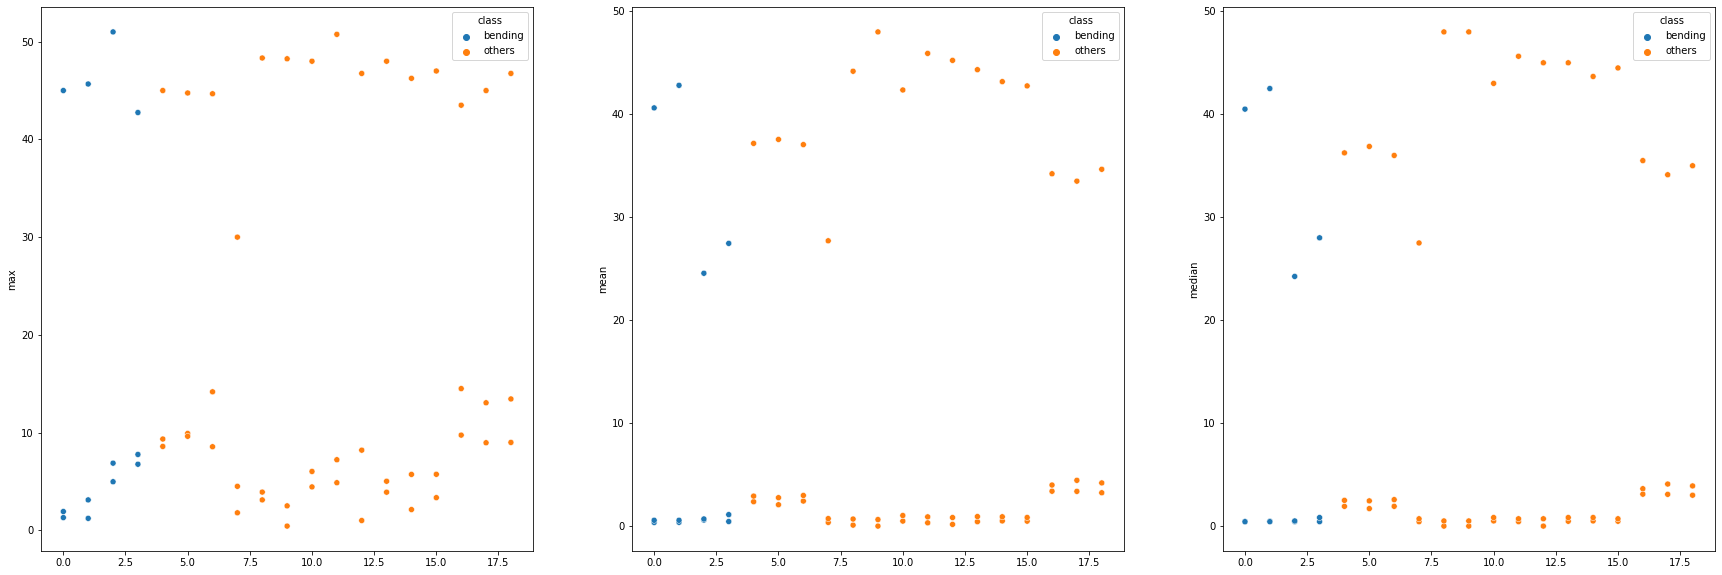

In [24]:
fig, axs = plt.subplots(1,3, figsize=(30, 10))

sns.scatterplot(ax = axs[0], data = max_7c , x = max_7c.index, y ='max', hue="class")
sns.scatterplot(ax = axs[1], data = mean_7c , x = mean_7c.index, y='mean', hue="class")
sns.scatterplot(ax = axs[2], data = median_7c , x = median_7c.index, y='median', hue="class")